# 채널정보 EDA

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 폰트 목록을 갱신하고, 'NanumGothic' 폰트를 기본 폰트로 설정합니다.
font_path = 'C:/Windows/Fonts/NanumGothic.ttf' 
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

import sys
sys.path.append('../utils')

In [2]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
from preprocessing import (
    DateElapsedTransformer, NumericFeaturePreprocessor, ObjectFeaturePreprocessor, NumericTypeOptimizer,
)

pre_optimizer = NumericTypeOptimizer(mode='pre')
date_transformer = DateElapsedTransformer()
numeric_transformer = NumericFeaturePreprocessor()
object_transformer = ObjectFeaturePreprocessor()
post_optimizer = NumericTypeOptimizer(mode='post')

preprocessing_pipeline = Pipeline([
    ('pre_optimizer', pre_optimizer),
    ('object', object_transformer),
    ('date', date_transformer),
    ('numeric', numeric_transformer),
    ('post_optimizer', post_optimizer),
])

# Set display configuration to visualize the pipeline
set_config(display='diagram')

# Display the pipeline
preprocessing_pipeline

Pipeline(steps=[('pre_optimizer', NumericTypeOptimizer(mode='pre')),
                ('object',
                 ObjectFeaturePreprocessor(exclude_columns=['ID', 'Segment'])),
                ('date',
                 DateElapsedTransformer(base_date=Timestamp('2019-01-01 00:00:00'),
                                        exclude_columns=['ID', 'Segment',
                                                         '기준년월'])),
                ('numeric',
                 NumericFeaturePreprocessor(exclude_columns=['기준년월'])),
                ('post_optimizer', NumericTypeOptimizer())])

In [3]:
from sklearn.preprocessing import LabelEncoder
from data_loader import load_data

channel_df, channel_test_df = load_data("6.채널정보")

X = channel_df.drop(columns=['ID', '기준년월'])
X = preprocessing_pipeline.fit_transform(X)
X.info()

✅ File: ../../dataset/train/6.채널정보\201807_train_채널정보.parquet Completed!
✅ File: ../../dataset/train/6.채널정보\201808_train_채널정보.parquet Completed!
✅ File: ../../dataset/train/6.채널정보\201809_train_채널정보.parquet Completed!
✅ File: ../../dataset/train/6.채널정보\201810_train_채널정보.parquet Completed!
✅ File: ../../dataset/train/6.채널정보\201811_train_채널정보.parquet Completed!
✅ File: ../../dataset/train/6.채널정보\201812_train_채널정보.parquet Completed!
🔹 Shape : (2400000, 105)

✅ File: ../../dataset/test/6.채널정보\201807_test_채널정보.parquet Completed!
✅ File: ../../dataset/test/6.채널정보\201808_test_채널정보.parquet Completed!
✅ File: ../../dataset/test/6.채널정보\201809_test_채널정보.parquet Completed!
✅ File: ../../dataset/test/6.채널정보\201810_test_채널정보.parquet Completed!
✅ File: ../../dataset/test/6.채널정보\201811_test_채널정보.parquet Completed!
✅ File: ../../dataset/test/6.채널정보\201812_test_채널정보.parquet Completed!
🔹 Shape : (600000, 105)
Numeric Type Optimizer Transforming...
🧠 [mode=pre] 메모리 최적화: 2914.05 MB → 1362.23 MB (53.3% 감소)
Ob

In [5]:
channel_df = optimize_numeric_types(channel_df, verbose=True)
channel_test_df = optimize_numeric_types(channel_test_df, verbose=True)

🔹 메모리 사용량: 3090.29 MB → 1529.31 MB  (50.5% 감소)
🔹 메모리 사용량: 771.46 MB → 381.21 MB  (50.6% 감소)


In [7]:
channel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Columns: 105 entries, 기준년월 to 홈페이지_선결제건수_R3M
dtypes: object(7), uint16(1), uint32(1), uint8(96)
memory usage: 361.6+ MB


In [8]:
object_columns = channel_df.select_dtypes(include=['object']).columns.tolist()
object_columns

['ID',
 '인입횟수_ARS_R6M',
 '이용메뉴건수_ARS_R6M',
 '방문횟수_PC_R6M',
 '방문일수_PC_R6M',
 '방문횟수_앱_R6M',
 'OS구분코드']

In [9]:
unique_values = {col: channel_df[col].unique() for col in object_columns if col != 'ID'}
unique_values

{'인입횟수_ARS_R6M': array(['10회 이상', '1회 이상'], dtype=object),
 '이용메뉴건수_ARS_R6M': array(['10회 이상', '1회 이상', '30회 이상', '20회 이상'], dtype=object),
 '방문횟수_PC_R6M': array(['1회 이상', '10회 이상', '20회 이상', '30회 이상', '40회 이상'], dtype=object),
 '방문일수_PC_R6M': array(['1회 이상', '10회 이상', '20회 이상', '30회 이상'], dtype=object),
 '방문횟수_앱_R6M': array(['1회 이상', '30회 이상', '10회 이상', '50회 이상', '60회 이상', '20회 이상',
        '40회 이상', '70회 이상', '80회 이상'], dtype=object),
 'OS구분코드': array(['Android', None, 'IOS'], dtype=object)}

In [10]:
channel_df['OS구분코드'] = channel_df['OS구분코드'].fillna('Unknown')
channel_df['OS구분코드'].unique()

array(['Android', 'Unknown', 'IOS'], dtype=object)

In [11]:
for col in unique_values:
    channel_df[col] = channel_df[col].astype('category')
    channel_test_df[col] = channel_test_df[col].astype('category')

In [12]:
int_columns = channel_df.select_dtypes(include=['integer']).columns
int_columns

Index(['기준년월', '인입일수_ARS_R6M', '인입월수_ARS_R6M', '인입후경과월_ARS', '인입횟수_ARS_B0M',
       '이용메뉴건수_ARS_B0M', '인입일수_ARS_B0M', '방문월수_PC_R6M', '방문후경과월_PC_R6M',
       '방문일수_앱_R6M', '방문월수_앱_R6M', '방문후경과월_앱_R6M', '방문횟수_모바일웹_R6M',
       '방문일수_모바일웹_R6M', '방문월수_모바일웹_R6M', '방문후경과월_모바일웹_R6M', '방문횟수_PC_B0M',
       '방문일수_PC_B0M', '방문횟수_앱_B0M', '방문일수_앱_B0M', '방문횟수_모바일웹_B0M',
       '방문일수_모바일웹_B0M', '인입횟수_IB_R6M', '인입횟수_금융_IB_R6M', '인입일수_IB_R6M',
       '인입월수_IB_R6M', '이용메뉴건수_IB_R6M', '인입후경과월_IB_R6M', '인입횟수_IB_B0M',
       '인입일수_IB_B0M', '이용메뉴건수_IB_B0M', '인입불만횟수_IB_R6M', '인입불만일수_IB_R6M',
       '인입불만월수_IB_R6M', '인입불만후경과월_IB_R6M', '인입불만횟수_IB_B0M', '인입불만일수_IB_B0M',
       '상담건수_B0M', 'IB문의건수_사용승인내역_B0M', 'IB문의건수_한도_B0M', 'IB문의건수_선결제_B0M',
       'IB문의건수_결제_B0M', 'IB문의건수_할부_B0M', 'IB문의건수_정보변경_B0M', 'IB문의건수_결제일변경_B0M',
       'IB문의건수_명세서_B0M', 'IB문의건수_비밀번호_B0M', 'IB문의건수_SMS_B0M', 'IB문의건수_APP_B0M',
       'IB문의건수_부대서비스_B0M', 'IB문의건수_포인트_B0M', 'IB문의건수_카드발급_B0M',
       'IB문의건수_BL_B0M', 'IB문의건수_분실도난_B0M', 'IB문의

In [13]:
int_unique_values = {col: channel_df[col].unique() for col in int_columns if col != '기준년월'}
int_unique_values

{'인입일수_ARS_R6M': array([ 8,  0,  1, 10,  4,  5,  2,  9,  6,  3, 11,  7, 12], dtype=uint8),
 '인입월수_ARS_R6M': array([6, 0, 1, 2, 3, 4, 5], dtype=uint8),
 '인입후경과월_ARS': array([0, 5, 4, 2, 1, 3], dtype=uint8),
 '인입횟수_ARS_B0M': array([2, 0, 3, 1], dtype=uint8),
 '이용메뉴건수_ARS_B0M': array([6, 0, 5, 4, 7], dtype=uint8),
 '인입일수_ARS_B0M': array([2, 0, 1], dtype=uint8),
 '방문월수_PC_R6M': array([0, 6, 1, 2, 3, 5], dtype=uint8),
 '방문후경과월_PC_R6M': array([6, 0, 2, 3, 1, 4, 5], dtype=uint8),
 '방문일수_앱_R6M': array([ 0, 30,  5, 16,  3,  1,  7, 26,  6, 41,  9, 28, 24,  2,  8, 10, 53,
        32, 18, 17, 21, 39, 19, 29,  4, 12, 46, 11, 15, 37, 25, 20, 47, 14,
        13, 31, 22, 33, 27, 23, 44, 34, 42, 38, 35, 50, 36, 52, 54, 51, 40,
        49, 48, 61, 57, 55, 43, 45, 56, 59, 60, 58, 62, 63, 64],
       dtype=uint8),
 '방문월수_앱_R6M': array([0, 6, 5, 1, 3, 4, 2], dtype=uint8),
 '방문후경과월_앱_R6M': array([6, 0, 4, 3, 2, 5, 1], dtype=uint8),
 '방문횟수_모바일웹_R6M': array([ 0,  4,  5,  3,  6,  2,  7,  8,  9, 13], dtype=uint

In [16]:
# 개수가 0개이거나 1개인 column을 제거
drop_cols = [col for col in int_unique_values if channel_df[col].nunique() <= 1]
print(f"column 수 : {len(drop_cols)}")
drop_cols

column 수 : 36


['인입횟수_금융_IB_R6M',
 '인입불만횟수_IB_R6M',
 '인입불만일수_IB_R6M',
 '인입불만월수_IB_R6M',
 '인입불만후경과월_IB_R6M',
 '인입불만횟수_IB_B0M',
 '인입불만일수_IB_B0M',
 'IB문의건수_한도_B0M',
 'IB문의건수_결제_B0M',
 'IB문의건수_할부_B0M',
 'IB문의건수_정보변경_B0M',
 'IB문의건수_결제일변경_B0M',
 'IB문의건수_명세서_B0M',
 'IB문의건수_비밀번호_B0M',
 'IB문의건수_SMS_B0M',
 'IB문의건수_APP_B0M',
 'IB문의건수_부대서비스_B0M',
 'IB문의건수_포인트_B0M',
 'IB문의건수_BL_B0M',
 'IB문의건수_분실도난_B0M',
 'IB문의건수_CA_B0M',
 'IB상담건수_VOC_B0M',
 'IB상담건수_VOC민원_B0M',
 'IB상담건수_VOC불만_B0M',
 'IB상담건수_금감원_B0M',
 'IB문의건수_명세서_R6M',
 'IB문의건수_APP_R6M',
 'IB상담건수_VOC_R6M',
 'IB상담건수_VOC민원_R6M',
 'IB상담건수_VOC불만_R6M',
 'IB상담건수_금감원_R6M',
 '불만제기건수_B0M',
 '불만제기건수_R12M',
 '당사PAY_방문횟수_B0M',
 '당사PAY_방문횟수_R6M',
 '당사PAY_방문월수_R6M']

In [18]:
for col in drop_cols:
    channel_df = channel_df.drop(col, axis=1)
    channel_test_df = channel_test_df.drop(col, axis=1)

In [19]:
channel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 69 columns):
 #   Column             Dtype   
---  ------             -----   
 0   기준년월               uint32  
 1   ID                 object  
 2   인입횟수_ARS_R6M       category
 3   이용메뉴건수_ARS_R6M     category
 4   인입일수_ARS_R6M       uint8   
 5   인입월수_ARS_R6M       uint8   
 6   인입후경과월_ARS         uint8   
 7   인입횟수_ARS_B0M       uint8   
 8   이용메뉴건수_ARS_B0M     uint8   
 9   인입일수_ARS_B0M       uint8   
 10  방문횟수_PC_R6M        category
 11  방문일수_PC_R6M        category
 12  방문월수_PC_R6M        uint8   
 13  방문후경과월_PC_R6M      uint8   
 14  방문횟수_앱_R6M         category
 15  방문일수_앱_R6M         uint8   
 16  방문월수_앱_R6M         uint8   
 17  방문후경과월_앱_R6M       uint8   
 18  방문횟수_모바일웹_R6M      uint8   
 19  방문일수_모바일웹_R6M      uint8   
 20  방문월수_모바일웹_R6M      uint8   
 21  방문후경과월_모바일웹_R6M    uint8   
 22  방문횟수_PC_B0M        uint8   
 23  방문일수_PC_B0M        uint8   
 24  방문횟수_앱_B0M         uint8

In [20]:
channel_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 69 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   기준년월               600000 non-null  uint32  
 1   ID                 600000 non-null  object  
 2   인입횟수_ARS_R6M       600000 non-null  category
 3   이용메뉴건수_ARS_R6M     600000 non-null  category
 4   인입일수_ARS_R6M       600000 non-null  uint8   
 5   인입월수_ARS_R6M       600000 non-null  uint8   
 6   인입후경과월_ARS         600000 non-null  uint8   
 7   인입횟수_ARS_B0M       600000 non-null  uint8   
 8   이용메뉴건수_ARS_B0M     600000 non-null  uint8   
 9   인입일수_ARS_B0M       600000 non-null  uint8   
 10  방문횟수_PC_R6M        600000 non-null  category
 11  방문일수_PC_R6M        600000 non-null  category
 12  방문월수_PC_R6M        600000 non-null  uint8   
 13  방문후경과월_PC_R6M      600000 non-null  uint8   
 14  방문횟수_앱_R6M         600000 non-null  category
 15  방문일수_앱_R6M         600000 non-null

## Feature Selection

In [23]:
segment_df = pd.read_parquet('../dataset/train/member.parquet', engine='fastparquet')
segment_df = segment_df[['ID', '기준년월', 'Segment']]

channel_df = channel_df.merge(segment_df, on=['ID', '기준년월'], how='left')

In [24]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

def get_feature_importance(X, y, importance_type='gain', plot_top_n=30):
    """
    LightGBM을 이용해 Feature Importance를 계산하고, 상위 feature를 시각화합니다.
    
    Parameters:
    - X (pd.DataFrame): feature 데이터
    - y (pd.Series or np.array): target 데이터
    - importance_type (str): 'gain' 또는 'split' (중요도 기준)
    - plot_top_n (int): 중요도가 높은 feature 몇 개를 plot할지
    - random_state (int): seed 고정

    Returns:
    - feature_importance_df (pd.DataFrame): feature importance 데이터프레임
    - model (lgb.Booster): 학습된 LightGBM 모델
    """

    # LightGBM 데이터셋 구성
    lgb_train = lgb.Dataset(X, label=y)

    # LightGBM 기본 파라미터 (가볍게 학습)
    params = {
        'objective': 'multiclass',   # 다중 클래스 분류
        'num_class': 5,  # 클래스 수 자동 지정
        'boosting_type': 'gbdt',
        'metric': 'multi_logloss',   # 다중 클래스 로지 손실
        'verbosity': -1,
        'seed': 42,
        'learning_rate': 0.05,
        'num_leaves': 31,
        'min_data_in_leaf': 20
    }

    # 빠르게 학습 (에포크 100회로 제한)
    model = lgb.train(params, lgb_train, num_boost_round=100)

    # Feature Importance 가져오기
    importance = model.feature_importance(importance_type=importance_type)
    feature_names = X.columns

    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)

    # 시각화
    top_features = feature_importance_df.head(plot_top_n)
    
    plt.figure(figsize=(10, max(6, plot_top_n // 2)))
    plt.barh(top_features['feature'][::-1], top_features['importance'][::-1])
    plt.xlabel('Importance')
    plt.title(f'Top {plot_top_n} Feature Importance ({importance_type})')
    plt.tight_layout()
    plt.show()

    return feature_importance_df, model

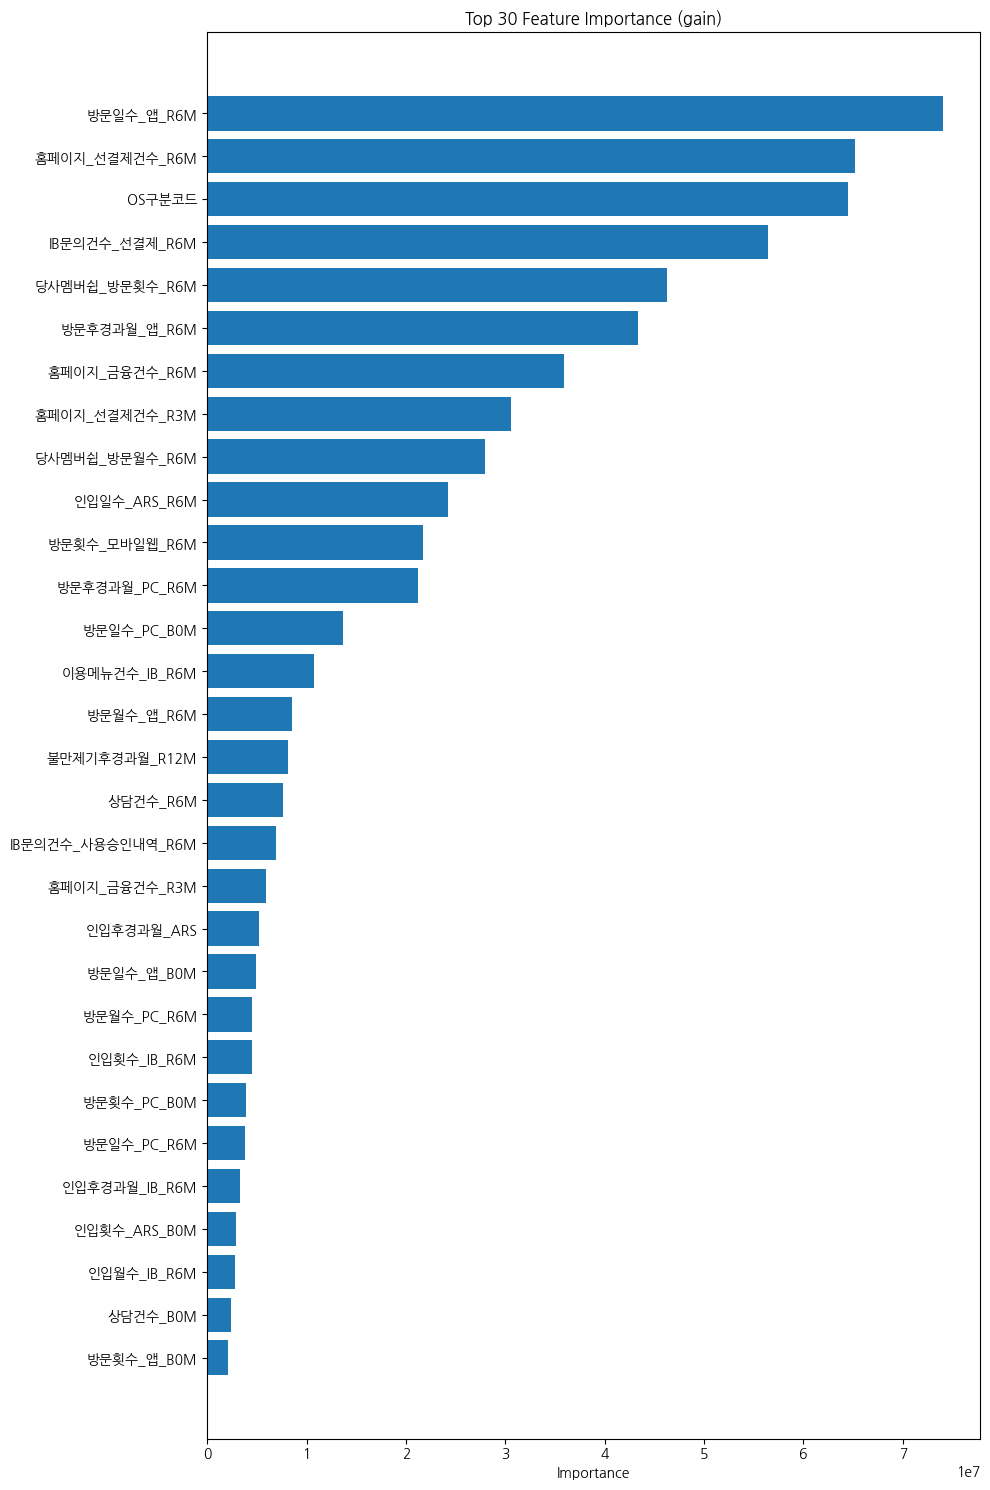

In [25]:
X = channel_df.drop(columns=['ID', '기준년월', 'Segment'])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(channel_df['Segment'])

importance_df, model = get_feature_importance(X, y, importance_type='gain', plot_top_n=30)

In [26]:
def select_top_features(importance_df, X, top_percent=0.3):
    """
    중요도 데이터프레임에서 상위 top_percent 비율만큼 feature를 선택하여 데이터셋 추출

    Parameters:
    - importance_df (pd.DataFrame): feature와 importance를 가진 데이터프레임
    - X (pd.DataFrame): 원본 feature 데이터셋
    - top_percent (float): 상위 몇 %를 선택할지 (기본 30%)

    Returns:
    - X_top (pd.DataFrame): 상위 feature만 선택된 데이터프레임
    - selected_features (list): 선택된 feature 리스트
    """
    n_features = int(len(importance_df) * top_percent)
    selected_features = importance_df['feature'].iloc[:n_features].tolist()
    X_top = X[selected_features]
    return X_top, selected_features

In [30]:
X_top, selected_features = select_top_features(importance_df, X, top_percent=0.3)
print(f"🔹 선택된 feature 수: {len(selected_features)}")
print(f"🔹 선택된 feature: {selected_features}")

🔹 선택된 feature 수: 20
🔹 선택된 feature: ['방문일수_앱_R6M', '홈페이지_선결제건수_R6M', 'OS구분코드', 'IB문의건수_선결제_R6M', '당사멤버쉽_방문횟수_R6M', '방문후경과월_앱_R6M', '홈페이지_금융건수_R6M', '홈페이지_선결제건수_R3M', '당사멤버쉽_방문월수_R6M', '인입일수_ARS_R6M', '방문횟수_모바일웹_R6M', '방문후경과월_PC_R6M', '방문일수_PC_B0M', '이용메뉴건수_IB_R6M', '방문월수_앱_R6M', '불만제기후경과월_R12M', '상담건수_R6M', 'IB문의건수_사용승인내역_R6M', '홈페이지_금융건수_R3M', '인입후경과월_ARS']


In [31]:
def plot_feature_correlation(X_top, threshold=0.8):
    """
    상위 feature들 간의 상관계수 행렬을 시각화하고, 
    threshold 이상인 feature쌍을 출력

    Parameters:
    - X_top (pd.DataFrame): 상위 feature 데이터프레임
    - threshold (float): 높은 상관관계로 간주할 기준
    """
    # 수치치형 feature만 선택
    numeric_features = X_top.select_dtypes(include=['number'])
    corr_matrix = numeric_features.corr()
    print(" 상관계수 행렬 생성 완료..!")

    # 상관관계 히트맵 그리기
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Top Features')
    plt.show()

    # threshold 이상인 feature 쌍 출력
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

    if high_corr_pairs:
        print(f"\n상관계수 {threshold} 이상인 feature 쌍:")
        for f1, f2, corr in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
            print(f"🔹{f1} vs {f2}: 상관계수 = {corr:.3f}")
    else:
        print(f"\n상관계수 {threshold} 이상인 feature 쌍이 없습니다.")
    
    return high_corr_pairs

 상관계수 행렬 생성 완료..!


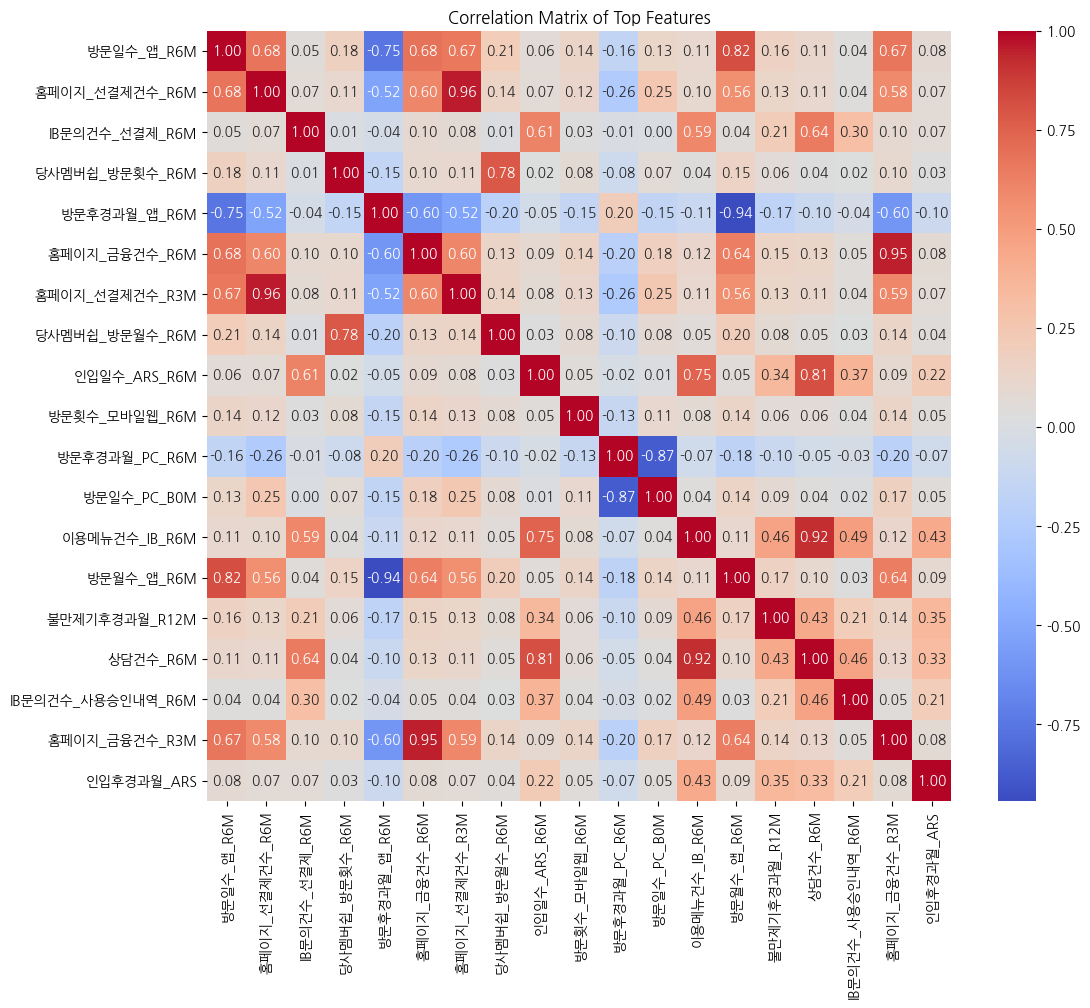


상관계수 0.8 이상인 feature 쌍:
🔹홈페이지_선결제건수_R3M vs 홈페이지_선결제건수_R6M: 상관계수 = 0.959
🔹홈페이지_금융건수_R3M vs 홈페이지_금융건수_R6M: 상관계수 = 0.952
🔹방문월수_앱_R6M vs 방문후경과월_앱_R6M: 상관계수 = -0.944
🔹상담건수_R6M vs 이용메뉴건수_IB_R6M: 상관계수 = 0.923
🔹방문일수_PC_B0M vs 방문후경과월_PC_R6M: 상관계수 = -0.868
🔹방문월수_앱_R6M vs 방문일수_앱_R6M: 상관계수 = 0.823
🔹상담건수_R6M vs 인입일수_ARS_R6M: 상관계수 = 0.814


In [32]:
# 상관계수 0.8 이상인 feature 쌍을 시각화
high_corr_pairs = plot_feature_correlation(X_top, threshold=0.8)

In [33]:
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)
high_corr_pairs

[('홈페이지_선결제건수_R3M', '홈페이지_선결제건수_R6M', np.float64(0.9593520029179898)),
 ('홈페이지_금융건수_R3M', '홈페이지_금융건수_R6M', np.float64(0.952282522244967)),
 ('상담건수_R6M', '이용메뉴건수_IB_R6M', np.float64(0.9233672712448738)),
 ('방문월수_앱_R6M', '방문일수_앱_R6M', np.float64(0.8225714660595805)),
 ('상담건수_R6M', '인입일수_ARS_R6M', np.float64(0.8140374412752488)),
 ('방문일수_PC_B0M', '방문후경과월_PC_R6M', np.float64(-0.868084844134332)),
 ('방문월수_앱_R6M', '방문후경과월_앱_R6M', np.float64(-0.9437137888635819))]

In [34]:
features_to_drop = set()
for f1, f2, corr in high_corr_pairs:
    if corr > 0.9:
        if f1 not in features_to_drop and f2 not in features_to_drop:
            features_to_drop.add(f1)

features_to_drop

{'상담건수_R6M', '홈페이지_금융건수_R3M', '홈페이지_선결제건수_R3M'}

In [35]:
for col in features_to_drop:
    X_top = X_top.drop(columns=[col])

X_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 17 columns):
 #   Column             Dtype   
---  ------             -----   
 0   방문일수_앱_R6M         uint8   
 1   홈페이지_선결제건수_R6M     uint8   
 2   OS구분코드             category
 3   IB문의건수_선결제_R6M     uint8   
 4   당사멤버쉽_방문횟수_R6M     uint16  
 5   방문후경과월_앱_R6M       uint8   
 6   홈페이지_금융건수_R6M      uint8   
 7   당사멤버쉽_방문월수_R6M     uint8   
 8   인입일수_ARS_R6M       uint8   
 9   방문횟수_모바일웹_R6M      uint8   
 10  방문후경과월_PC_R6M      uint8   
 11  방문일수_PC_B0M        uint8   
 12  이용메뉴건수_IB_R6M      uint8   
 13  방문월수_앱_R6M         uint8   
 14  불만제기후경과월_R12M      uint8   
 15  IB문의건수_사용승인내역_R6M  uint8   
 16  인입후경과월_ARS         uint8   
dtypes: category(1), uint16(1), uint8(15)
memory usage: 41.2 MB


In [36]:
filtered_channel_df = channel_df[['ID', '기준년월'] + X_top.columns.tolist()]
filtered_channel_df.to_parquet('../dataset/train/channel.parquet', index=False)

filtered_channel_test_df = channel_test_df[['ID', '기준년월'] + X_top.columns.tolist()]
filtered_channel_test_df.to_parquet('../dataset/test/channel.parquet', index=False)